In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df= pd.read_csv("gapminder_all.csv")
print(df.groupby('fertility')['life'].head())

0      75.3
1      58.3
2      75.5
3      72.5
4      81.5
       ... 
134    76.0
135    68.7
136    75.4
137    52.0
138    49.0
Name: life, Length: 139, dtype: float64


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   index            139 non-null    int64  
 1   population       139 non-null    int64  
 2   fertility        139 non-null    float64
 3   HIV              139 non-null    float64
 4   CO2              139 non-null    float64
 5   BMI_male         139 non-null    float64
 6   GDP              139 non-null    int64  
 7   BMI_female       139 non-null    float64
 8   life             139 non-null    float64
 9   child_mortality  139 non-null    float64
 10  Region           139 non-null    object 
dtypes: float64(7), int64(3), object(1)
memory usage: 12.1+ KB


In [6]:
df.describe()

,index,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality
count,139.000000,1.390000e+02,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000
mean,69.000000,3.549977e+07,3.005108,1.915612,4.459874,24.623054,16638.784173,126.701914,69.602878,45.097122
std,40.269923,1.095121e+08,1.615354,4.408974,6.268349,2.209368,19207.299083,4.471997,9.122189,45.724667
min,0.000000,2.773150e+05,1.280000,0.060000,0.008618,20.397420,588.000000,117.375500,45.200000,2.700000
25%,34.500000,3.752776e+06,1.810000,0.100000,0.496190,22.448135,2899.000000,123.232200,62.200000,8.100000
50%,69.000000,9.705130e+06,2.410000,0.400000,2.223796,25.156990,9938.000000,126.519600,72.000000,24.000000
75%,103.500000,2.791973e+07,4.095000,1.300000,6.589156,26.497575,23278.500000,130.275900,76.850000,74.200000
max,138.000000,1.197070e+09,7.590000,25.900000,48.702062,28.456980,126076.000000,135.492000,82.600000,192.000000


In [7]:
df.head()

,index,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
0,0,34811059,2.73,0.1,3.328945,24.59620,12314,129.9049,75.3,29.5,Middle East & North Africa
1,1,19842251,6.43,2.0,1.474353,22.25083,7103,130.1247,58.3,192.0,Sub-Saharan Africa
2,2,40381860,2.24,0.5,4.785170,27.50170,14646,118.8915,75.5,15.4,America
3,3,2975029,1.40,0.1,1.804106,25.35542,7383,132.8108,72.5,20.0,Europe & Central Asia
4,4,21370348,1.96,0.1,18.016313,27.56373,41312,117.3755,81.5,5.2,East Asia & Pacific


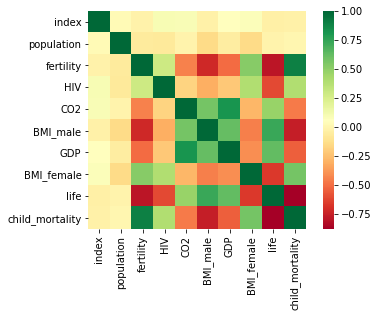

In [8]:
sns.heatmap(df.corr(),square= True , cmap= "RdYlGn")

In [27]:
# X=df["fertility"].values
# print(fer_boxcox)
X=fer_boxcox
y=df['life'].values

In [28]:
X=X.reshape(-1,1)
y=y.reshape(-1,1)

In [29]:
# import library
from sklearn.linear_model import LinearRegression

In [30]:
#create reg
reg = LinearRegression()

In [31]:

prediction_space= np.linspace (min(X),max(X),100).reshape(-1,1)
# print(prediction_space)
prediction_space.shape

(100, 1)

In [32]:
# print(X)
X.shape
reg.fit(X,y)

LinearRegression()

In [33]:
y_pred= reg.predict(X)
reg.predict([[3],[2]])
# array([[69.62557665],
#        [74.06945564]])

array([[17.1554006 ],
       [40.30675547]])

In [34]:
#print R2
print(reg.score(X,y))

0.6029627497734289


In [35]:
# print(X)
# print(y)
# print(y_pred)

<function matplotlib.pyplot.show(*args, **kw)>

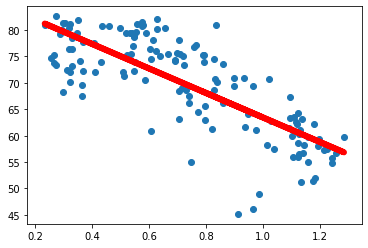

In [36]:
plt.scatter(X,y)
plt.plot(X, y_pred, color='red', linewidth=6)
plt.show

In [37]:

import pickle 
  


In [38]:
# Save the trained model as a pickle string. 
saved_model = pickle.dumps(reg) 
  
# Load the pickled model 
reg_from_pickle = pickle.loads(saved_model) 
m=[[6.43],[3]]
# s=m.reshape(-1,1)
# Use the loaded pickled model to make predictions
reg_from_pickle.predict(m) 
# reg_from_pickle.predict([[10]]) 

array([[-62.2537466],
       [ 17.1554006]])

In [39]:
df.loc[:, 'fertility'].head(n=3)

0    2.73
1    6.43
2    2.24
Name: fertility, dtype: float64

In [40]:
print(df.groupby('fertility'))
df.groupby('fertility')['life']

In [41]:
a=reg.intercept_.round(2)
m=reg.coef_.round(2)
print("y=",m[0,0],"x+",a[0,0])

IndexError: too many indices for array

In [42]:
df = pd.read_csv('gapminder_all.csv',index_col='fertility')

In [43]:
df.loc[6.43,'life'] #just in index column

58.3

In [26]:
input_fertility=0
mm=[[input_fertility]]
# s=m.reshape(-1,1)
# Use the loaded pickled model to make predictions
D=reg_from_pickle.predict(mm)
print('The predicted life value for this fertility is=',D[0,0])

try:
    real_data=df.loc[input_fertility,'life']
    print('The real life value for this fertility is=',max(real_data))
    error= abs((D[0,0]-max(real_data))/max(real_data))*100
    print('The error occured for this value is=',error,'%')
except:
    print('There is not any life value available for this specific ferility=', input_fertility)

NameError: name 'reg_from_pickle' is not defined

In [44]:
from sklearn.model_selection import train_test_split
Y=y
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=1)
reg2 = LinearRegression()
reg2.fit(X_train, Y_train)
y_test_predicted = reg2.predict(X_test)

y= -24.97 x+ [88.25]


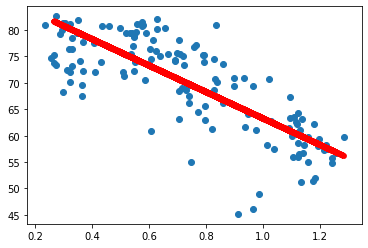

In [45]:
plt.scatter(X,y)
plt.plot(X_test, y_test_predicted, color='red', linewidth=6)
plt.show
a2=reg2.intercept_.round(2)
m2=reg2.coef_.round(2)
print("y=",m2[0,0],"x+",a2)

In [46]:
#print R2
print(reg2.score(X,y))

0.5981396365917291


In [47]:
from sklearn.metrics import mean_squared_error
mean_squared_error(Y, y_pred)

32.80150049593923

In [48]:
from sklearn.metrics import mean_squared_error
mean_squared_error(Y_test, y_test_predicted)

35.50711744072513

1.0907385330938268e-05


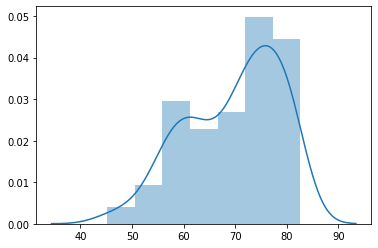

In [49]:
#skewness
#skewness
#skewness
#skewness
#skewness
#skewness
df= pd.read_csv("gapminder_all.csv")
c=[7,2,9,0,8,6,3,5,4,1]
resp=y
from scipy.stats import shapiro
print(shapiro(resp)[1])
sns.distplot(resp)
# so a p-value less than 0.05 indicates significant skewness.

In [50]:
#another method for getting skewness
#determine index for continuous variables
num_feats=df.dtypes[df.dtypes != 'object']. index
#calculate skew and sort
skew_feats=df[num_feats].skew().sort_values(ascending=False)
skewness=pd.DataFrame({'Skew':skew_feats})
print(skewness)
# a value near than 0 indicates no skewness.
df['fertility'].skew()

                     Skew
population       8.981542
HIV              3.918526
CO2              3.628596
GDP              2.358662
child_mortality  1.156400
fertility        0.967394
index            0.000000
BMI_female      -0.080250
BMI_male        -0.255106
life            -0.548382


0.9673942369047374

In [51]:
#  address skewed variables by transforming them
# 1-square root (sqrt(x)), 2-logarithmic (log(x)), and 3- reciprocal (1/x) 4-boxcox
# sqrt_resp = resp**(0.5)
# sns.distplot(sqrt_resp)
fer_sqrt=np.sqrt(df['fertility'])
fer_sqrt.skew()

0.6831771692132594

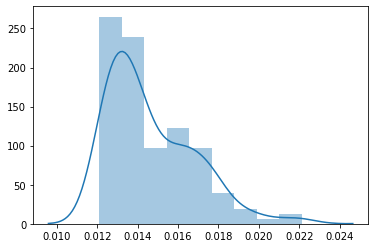

In [52]:
recip=1/resp
sns.distplot(recip)

In [53]:
# log_resp=np.log(resp)
# sns.distplot(log_resp)
fer_log=np.log(df['fertility'])
# fer_log.skew()
fer_log.skew()

0.39130458799634044

0.10234028498348569


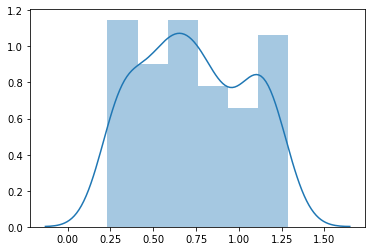

In [15]:
from scipy import stats
fer_boxcox=stats.boxcox(df['fertility'])[0]
print(pd.Series(fer_boxcox).skew())
sns.distplot(fer_boxcox)
# for i in skewed_features:
# df[i],lmbda=boxcox(df[i], lmbda= None )


In [66]:
r22=[]
rsme2=[] 
for i in range(100):
    X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.3, random_state=i)
    reg=LinearRegression()
    reg.fit (X_train, y_train)
    y_pred= reg.predict(X_test)
    r2= reg.score(X_test, y_test)
    rsme= np.sqrt(mean_squared_error(y_test, y_pred))
    r22.append(r2)
    rsme2.append(rsme)
#     print(r22)
#     rsme2
# print(r22)
print(min(r22),r22.index(min(r22)))
print(min(rsme2),rsme2.index(min(rsme2)))


0.14030415284573294 38
4.459580983918677 85


In [115]:
# a,b=np.arrange(10).reshape((5,2)),range(5)
a=np.arange(10).reshape((5,2))
a=[[6, 7],
        [8, 9],
        [2, 3]]
b=[[1],[2],[3]]
# a= range(6,10)
# b= range(5)
b
train_test_split(a,b,test_size=0.1, random_state=15)
# X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.3, random_state=i)

[[[8, 9], [6, 7]], [[2, 3]], [[2], [1]], [[3]]]

In [125]:
# Metrics
# Two commonly used metrics for classification are precision and recall
# precision         = (TP)/(TP+FP)
# recall=sensitivity= (TP)/(TP+FN)
# specificity       = (TN)/(TN+FP)
# F1        = 2*(precision)*(recall)/(precision+recall)
# ROC curve =  array of the false positive rates, an array of the true positive rates and the thresholds.
# We often will be in a situation of choosing between increasing the recall (while lowering the precision) or vise versa


from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

df = pd.read_csv('https://sololearn.com/uploads/files/titanic.csv')
df['male'] = df['Sex'] == 'male'
X = df[['Pclass', 'male', 'Age', 'Siblings/Spouses', 'Parents/Children', 'Fare']].values
y = df['Survived'].values
model = LogisticRegression()
model.fit(X, y)
y_pred = model.predict(X)

print("accuracy:", accuracy_score(y, y_pred))
print("precision:", precision_score(y, y_pred))
print("recall:", recall_score(y, y_pred))
print("f1 score:", f1_score(y, y_pred))


from sklearn.metrics import confusion_matrix
print(confusion_matrix(y, y_pred))
# Output:
# [[475  70]
#  [103 239]]

accuracy: 0.8049605411499436
precision: 0.7734627831715211
recall: 0.6988304093567251
f1 score: 0.7342549923195083
[[475  70]
 [103 239]]


In [126]:
# The same code above using train test split to see the results and compare
# every time different metrics

import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

df = pd.read_csv('https://sololearn.com/uploads/files/titanic.csv')
df['male'] = df['Sex'] == 'male'
X = df[['Pclass', 'male', 'Age', 'Siblings/Spouses', 'Parents/Children', 'Fare']].values
y = df['Survived'].values

X_train, X_test, y_train, y_test = train_test_split(X, y)

# building the model
model = LogisticRegression()
model.fit(X_train, y_train)

# evaluating the model
# print("accuracy:", model.score(X_test, y_test))
y_pred = model.predict(X_test)
print("accuracy:", accuracy_score(y_test, y_pred))
print("precision:", precision_score(y_test, y_pred))
print("recall:", recall_score(y_test, y_pred))
print("f1 score:", f1_score(y_test, y_pred))

# Our accuracy, precision, recall and F1 score values are actually very similar 
# to the values when we used the entire dataset. This is a sign our model is not overfit!

accuracy: 0.8198198198198198
precision: 0.8292682926829268
recall: 0.723404255319149
f1 score: 0.7727272727272727


In [129]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score, precision_recall_fscore_support

sensitivity_score = recall_score
def specificity_score(y_true, y_pred):
    p, r, f, s = precision_recall_fscore_support(y_true, y_pred)
    return r[0]

df = pd.read_csv('https://sololearn.com/uploads/files/titanic.csv')
df['male'] = df['Sex'] == 'male'
X = df[['Pclass', 'male', 'Age', 'Siblings/Spouses', 'Parents/Children', 'Fare']].values
y = df['Survived'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=5)

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("sensitivity:", sensitivity_score(y_test, y_pred))
print("specificity:", specificity_score(y_test, y_pred))

sensitivity: 0.6829268292682927
specificity: 0.9214285714285714


In [130]:
# Adjusting the Logistic Regression Threshold in Sklearn
# y_pred = model.predict_proba(X_test)[:, 1] > 0.75

import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score
from sklearn.model_selection import train_test_split

df = pd.read_csv('https://sololearn.com/uploads/files/titanic.csv')
df['male'] = df['Sex'] == 'male'
X = df[['Pclass', 'male', 'Age', 'Siblings/Spouses', 'Parents/Children', 'Fare']].values
y = df['Survived'].values

X_train, X_test, y_train, y_test = train_test_split(X, y)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict_proba(X_test)[:, 1] > 0.75

print("precision:", precision_score(y_test, y_pred))
print("recall:", recall_score(y_test, y_pred))


precision: 0.9230769230769231
recall: 0.391304347826087


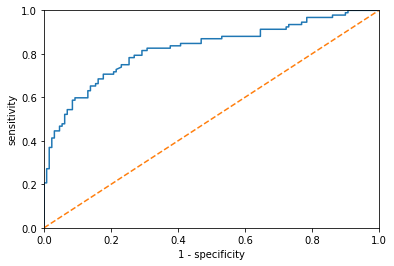

In [133]:
# ROC curve 
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred_proba = model.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:,1])

plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('1 - specificity')
plt.ylabel('sensitivity')
plt.show()

In [134]:
# You can see that the blue curve outperforms the orange one since the blue line is almost always above the orange line.

# To get an empirical measure of this, we calculate the Area Under the Curve,
# also called the AUC. This is the area under the ROC curve. It’s a value between 0 and 1, the higher the better.
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

df = pd.read_csv('https://sololearn.com/uploads/files/titanic.csv')
df['male'] = df['Sex'] == 'male'
X = df[['Pclass', 'male', 'Age', 'Siblings/Spouses', 'Parents/Children', 'Fare']].values
y = df['Survived'].values

X_train, X_test, y_train, y_test = train_test_split(X, y)

model1 = LogisticRegression()
model1.fit(X_train, y_train)
y_pred_proba1 = model1.predict_proba(X_test)
print("model 1 AUC score:", roc_auc_score(y_test, y_pred_proba1[:, 1]))

model2 = LogisticRegression()
model2.fit(X_train[:, 0:2], y_train)
y_pred_proba2 = model2.predict_proba(X_test[:, 0:2])
print("model 1 AUC score:", roc_auc_score(y_test, y_pred_proba2[:, 1]))

model 1 AUC score: 0.864632824872885
model 1 AUC score: 0.8505876469117278


In [144]:
# Kfold cross validation 

from sklearn.model_selection import KFold
import pandas as pd

df = pd.read_csv('https://sololearn.com/uploads/files/titanic.csv')
X = df[['Age', 'Fare']].values[:6]
y = df['Survived'].values[:6]

kf = KFold(n_splits=6, shuffle=False)
print(list(kf.split(X)))
print(X)

[(array([1, 2, 3, 4, 5]), array([0])), (array([0, 2, 3, 4, 5]), array([1])), (array([0, 1, 3, 4, 5]), array([2])), (array([0, 1, 2, 4, 5]), array([3])), (array([0, 1, 2, 3, 5]), array([4])), (array([0, 1, 2, 3, 4]), array([5]))]
[[22.      7.25  ]
 [38.     71.2833]
 [26.      7.925 ]
 [35.     53.1   ]
 [35.      8.05  ]
 [27.      8.4583]]


In [145]:
# Creating Training and Test Sets with the Folds

from sklearn.model_selection import KFold
import pandas as pd
df = pd.read_csv('https://sololearn.com/uploads/files/titanic.csv')
X = df[['Age', 'Fare']].values[:6]
y = df['Survived'].values[:6]

kf = KFold(n_splits=3, shuffle=True)

splits = list(kf.split(X))
first_split = splits[0]
train_indices, test_indices = first_split
print("training set indices:", train_indices)
print("test set indices:", test_indices)

X_train = X[train_indices]
X_test = X[test_indices]
y_train = y[train_indices]
y_test = y[test_indices]
print("X_train")
print(X_train)
print("y_train", y_train)
print("X_test")
print(X_test)
print("y_test", y_test)

training set indices: [0 1 3 4]
test set indices: [2 5]
X_train
[[22.      7.25  ]
 [38.     71.2833]
 [35.     53.1   ]
 [35.      8.05  ]]
y_train [0 1 1 0]
X_test
[[26.      7.925 ]
 [27.      8.4583]]
y_test [1 0]


In [147]:
# Build a model with it

from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
import pandas as pd

df = pd.read_csv('https://sololearn.com/uploads/files/titanic.csv')
df['male'] = df['Sex'] == 'male'
X = df[['Pclass', 'male', 'Age', 'Siblings/Spouses', 'Parents/Children', 'Fare']].values
y = df['Survived'].values

kf = KFold(n_splits=5, shuffle=True)

splits = list(kf.split(X))
train_indices, test_indices = splits[0]
X_train = X[train_indices]
X_test = X[test_indices]
y_train = y[train_indices]
y_test = y[test_indices]

model = LogisticRegression()
model.fit(X_train, y_train)
print(model.score(X_test, y_test))

0.8025387870239774


In [151]:
# Loop Over All the Folds

scores = []
kf = KFold(n_splits=5, shuffle=True)
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    model = LogisticRegression()
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))
print(scores)
# [0.75847, 0.83146, 0.85876, 0.76271, 0.74011]
print(np.mean(scores))
# 0.79029
final_model = LogisticRegression()
final_model.fit(X, y)

[0.797752808988764, 0.7808988764044944, 0.8022598870056498, 0.7627118644067796, 0.8531073446327684]
0.7993461562876911


LogisticRegression()

In [1]:
# model comparison with different features 
# Choosing a Best Model

from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd
import numpy as np

df = pd.read_csv('https://sololearn.com/uploads/files/titanic.csv')
df['male'] = df['Sex'] == 'male'

kf = KFold(n_splits=5, shuffle=True)

X1 = df[['Pclass', 'male', 'Age', 'Siblings/Spouses', 'Parents/Children', 'Fare']].values
X2 = df[['Pclass', 'male', 'Age']].values
X3 = df[['Fare', 'Age']].values
y = df['Survived'].values

def score_model(X, y, kf):
    accuracy_scores = []
    precision_scores = []
    recall_scores = []
    f1_scores = []
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        model = LogisticRegression()
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy_scores.append(accuracy_score(y_test, y_pred))
        precision_scores.append(precision_score(y_test, y_pred))
        recall_scores.append(recall_score(y_test, y_pred))
        f1_scores.append(f1_score(y_test, y_pred))
    print("accuracy:", np.mean(accuracy_scores))
    print("precision:", np.mean(precision_scores))
    print("recall:", np.mean(recall_scores))
    print("f1 score:", np.mean(f1_scores))

print("Logistic Regression with all features")
score_model(X1, y, kf)
print()
print("Logistic Regression with Pclass, Sex & Age features")
score_model(X2, y, kf)
print()
print("Logistic Regression with Fare & Age features")
score_model(X3, y, kf)

model = LogisticRegression()
model.fit(X1, y)
model.predict([[3, False, 25, 0, 1, 2]]) 
# Output: [1]
# Our expectation is that women are more likely to survive, so having the sex would be a very valuable predictor.
# Since the first two models have equivalent results, it makes sense to choose the simpler model,
# the one that uses the Pclass, Sex & Age features.

Logistic Regression with all features
accuracy: 0.7993207642988638
precision: 0.7630424896171228
recall: 0.6988854006468769
f1 score: 0.7268432541031813

Logistic Regression with Pclass, Sex & Age features
accuracy: 0.7914619437567447
precision: 0.7442803757843341
recall: 0.705838495943075
f1 score: 0.7216433027348845

Logistic Regression with Fare & Age features
accuracy: 0.6538818002920079
precision: 0.6428634268956849
recall: 0.23315834242192007
f1 score: 0.3404211204616884


array([1], dtype=int64)

In [2]:
# spot check algorithms
# model comparison with different features 
# Choosing a Best Model
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd
import numpy as np

df = pd.read_csv('https://sololearn.com/uploads/files/titanic.csv')
df['male'] = df['Sex'] == 'male'

kf = KFold(n_splits=5, shuffle=True)

X1 = df[['Pclass', 'male', 'Age', 'Siblings/Spouses', 'Parents/Children', 'Fare']].values
X = df[['Pclass', 'male', 'Age']].values
X3 = df[['Fare', 'Age']].values
y = df['Survived'].values

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y)

models = []
models.append(('NB',GaussianNB()))
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('SVM', SVC()))

# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10)
    cv_results = model_selection.cross_val_score(model, X_train, y_train)
    results.append(cv_results)
    names.append(name)
    msg= "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)


NB: 0.763910 (0.027151)
LR: 0.786466 (0.029924)
LDA: 0.777444 (0.029159)
KNN: 0.724812 (0.018170)
CART: 0.795489 (0.023003)
SVM: 0.634586 (0.018170)


In [8]:
# graph exporting for decision tree
# Visualizing Decision Trees

# pip install graphviz
# conda install python-graphviz

from sklearn.tree import export_graphviz
import graphviz
from IPython.display import Image

feature_names = ['Pclass', 'male','Age','Fare']
X = df[feature_names].values
y = df['Survived'].values

dt = DecisionTreeClassifier(max_depth=7, min_samples_leaf=2, max_leaf_nodes=30)
dt.fit(X, y)

kf = KFold(n_splits=5, shuffle=True)
for criterion in ['gini', 'entropy']:
    print("Decision Tree - {}".format(criterion))
    accuracy = []
    precision = []
    recall = []
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        dt = DecisionTreeClassifier(criterion=criterion)
        dt.fit(X_train, y_train)
        y_pred = dt.predict(X_test)
        accuracy.append(accuracy_score(y_test, y_pred))
        precision.append(precision_score(y_test, y_pred))
        recall.append(recall_score(y_test, y_pred))
    print("accuracy:", np.mean(accuracy))
    print("precision:", np.mean(precision))
    print("recall:", np.mean(recall))
    
dot_file = export_graphviz(dt, feature_names=feature_names)
graph = graphviz.Source(dot_file)
graph.render(filename='tree', format='png', cleanup=True)

Decision Tree - gini
accuracy: 0.7734399796864089
precision: 0.7048138669505608
recall: 0.7100366755840708
Decision Tree - entropy
accuracy: 0.7711864406779662
precision: 0.7052087010912086
recall: 0.6943468450868832


'tree.png'

In [11]:
#  pre-pruning parameters. In order to decide on which to use, we use cross validation and compare metrics

import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

df = pd.read_csv('https://sololearn.com/uploads/files/titanic.csv')
df['male'] = df['Sex'] == 'male'
X = df[['Pclass', 'male', 'Age', 'Siblings/Spouses', 'Parents/Children', 'Fare']].values
y = df['Survived'].values

param_grid = {
    'max_depth': [5, 15, 25],
    'min_samples_leaf': [1, 3],
    'max_leaf_nodes': [10, 20, 35, 50]}
dt = DecisionTreeClassifier()
gs = GridSearchCV(dt, param_grid, scoring='f1', cv=5)
gs.fit(X, y)
print("best params:", gs.best_params_)
# best parameters: {'max_depth': 15, 'max_leaf_nodes': 35, 'min_samples_leaf': 1}
print("best score:", gs.best_score_)

# Interpretability is the biggest advantage of Decision Trees.
# It will depend on the situation whether this is important for your problem.



best params: {'max_depth': 25, 'max_leaf_nodes': 35, 'min_samples_leaf': 1}
best score: 0.7734310143952028
